In [1]:
#Importing the Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#Data Collection and Analysis

# loading the diabetes dataset to a pandas DataFrame
kidney_dataset = pd.read_csv('C:\\Users\\prajw\\Kidney-Try3\\Kidney_stone_detection\\Dataset\\updated-dataset.csv')

In [3]:
# printing the first 5 rows of the dataset
kidney_dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48,80,1.020,1,0,0,1,0,0,121,...,44,7800,5.2,1,1,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,463,...,38,6000,2.6,0,0,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,3.4,0,1,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,0,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,0,0,0,0,0,0


In [4]:
# number of rows and Columns in this dataset
kidney_dataset.shape

(400, 25)

In [5]:
# getting the statistical measures of the data
kidney_dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.157500,76.325000,1.017462,1.042500,0.457500,0.802500,0.76500,0.105000,0.055000,147.020000,...,38.950000,8393.000000,4.696750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.615005,13.664229,0.005741,1.360265,1.089109,0.398611,0.42453,0.306937,0.228266,78.390384,...,8.990248,2876.863197,1.038683,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,100.000000,...,33.000000,6500.000000,3.900000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,121.000000,...,41.000000,8000.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.00000,0.000000,0.000000,159.250000,...,45.000000,9800.000000,5.400000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.00000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
kidney_dataset['class'].value_counts()

0    250
1    150
Name: class, dtype: int64

In [7]:
kidney_dataset.groupby('class').mean()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
class,,,,,,,,,,,,,,,,,,,,,
0,54.112000,79.440000,1.014540,1.628000,0.732,0.688000,0.632000,0.168,0.088,170.12,...,11.035200,34.548000,8720.0,4.276,0.588,0.548,0.136,0.328,0.304,0.24
1,46.233333,71.133333,1.022333,0.066667,0.000,0.993333,0.986667,0.000,0.000,108.52,...,15.058667,46.286667,7848.0,5.398,0.000,0.000,0.000,0.000,0.000,0.00


In [8]:
# separating the data and labels
X = kidney_dataset.drop(['class'], axis = 1)
Y = kidney_dataset['class']

In [9]:
print(X)

     age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0     48              80             1.020        1      0                0   
1      7              50             1.020        4      0                1   
2     62              80             1.010        2      3                1   
3     48              70             1.005        4      0                1   
4     51              80             1.010        2      0                1   
..   ...             ...               ...      ...    ...              ...   
395   55              80             1.020        0      0                1   
396   42              70             1.025        0      0                1   
397   12              80             1.020        0      0                1   
398   17              60             1.025        0      0                1   
399   58              80             1.025        0      0                1   

     pus_cell  pus_cell_clumps  bacteria  blood_glu

In [10]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64


Train Test Split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(400, 24) (320, 24) (80, 24)


Training the Model

In [13]:
classifier = svm.SVC(kernel='linear')

In [14]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [15]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [16]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.990625


In [17]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.975


Making a Predictive System

In [19]:
input_data = (48,80,1.02,1,0,0,1,0,0,121,36,1.2,135,3.8,15.4,44,7800,5.2,1,1,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person has ckd')
else:
  print('The person dose not have ckd')

[0]
The person has ckd


C:\Users\prajw\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [20]:
import pickle

In [21]:
filename = 'kidney_svm_final.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [22]:
# loading the saved model
loaded_model = pickle.load(open('kidney_svm_final.sav', 'rb'))

In [23]:
input_data = (48,80,1.02,1,0,0,1,0,0,121,36,1.2,135,3.8,15.4,44,7800,5.2,1,1,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person has ckd')
else:
  print('The person dose not have ckd')

[0]
The person has ckd


C:\Users\prajw\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
for column in X.columns:
  print(column)

age
blood_pressure
specific_gravity
albumin
sugar
red_blood_cells
pus_cell
pus_cell_clumps
bacteria
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count
hypertension
diabetes_mellitus
coronary_artery_disease
appetite
peda_edema
aanemia


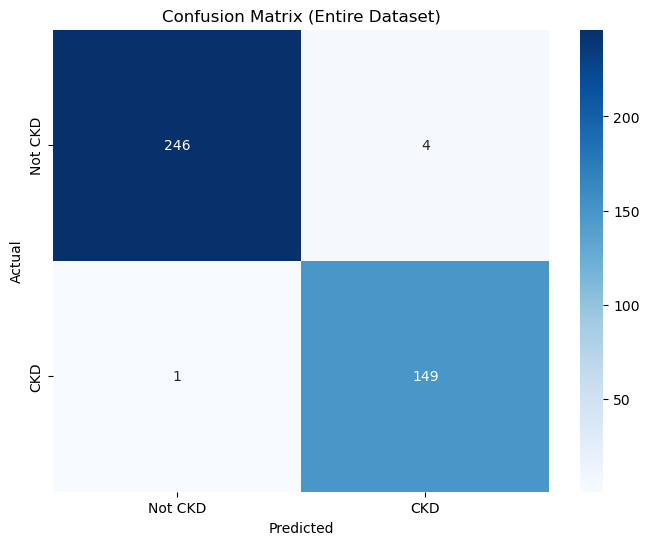

In [26]:
from sklearn.metrics import confusion_matrix

# Combine features and labels for the entire dataset
X_entire = pd.concat([X_train, X_test])
Y_entire = pd.concat([Y_train, Y_test])

# Generate predictions for the entire dataset
Y_pred_entire = classifier.predict(X_entire)

# Create the confusion matrix
conf_matrix_entire = confusion_matrix(Y_entire, Y_pred_entire)

# Plotting the confusion matrix for the entire dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_entire, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Entire Dataset)')
plt.show()
